###Import Module

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from collections import Counter
import plotly.express as pxx

In [ ]:
# Import libraries, features and settings (not all of these are needed so pull what you need)

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import io
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import preprocessing
plt.rc("font", size = 14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
sns.set(style="white")
sns.set(style="whitegrid", color_codes = True)

### Import Data

In [ ]:
!gdown 1yXGLYvS9BQ6E3rVjPFQVQCLuBLlja2CD

Downloading...
From: https://drive.google.com/uc?id=1yXGLYvS9BQ6E3rVjPFQVQCLuBLlja2CD
To: /content/data_kesehatan-Mental-SRQ-2023--Filtered.xlsx
100% 110M/110M [00:03<00:00, 36.1MB/s]


In [ ]:
data = pd.read_excel("/content/data_kesehatan-Mental-SRQ-2023--Filtered.xlsx")

###Preprocessing Data

In [ ]:
data.head()

,ID,WILAYAH,JENIS KELAMIN,USIA,LAMA BERDINAS,PENDIDIKAN TERAKHIR,TINGGI BADAN,BERAT BADAN,LINGKAR PINGGANG,Status Perkawinan,...,Sumber air bersih di tempat tinggal saudara ?,Penggunaan air bersih untuk makan & minum bersumber dari :,Berapa jarak jamban dengan sumur dirumah saudara ?,Bagaimana saluran pembuangan air (sanitasi) rumah tangga?,Apakah terdapat tempat sampah di sekitar rumah?,Berapa jarak tempat sampah dengan rumah saudara ?,Apakah di sekitar tempat tinggal Saudara tersedia fasilitas umum (fasum) untuk kegiatan/aktivitas olah raga?,Kelompok Umur,NILAI IMT,IMT
0,1,KALBAR,LAKI - LAKI,34.0,16.0,SMA,168.9,85.0,100.0,Menikah,...,Air PAM,Tadah hujan,Lebih dari 12 meter,Ada,"Ada, terbuka",Lebih dari 10 meter,Tidak ada,25 - 34,29.796114,Obesitas
1,2,KALBAR,LAKI - LAKI,43.0,23.0,SMA,169.5,70.0,80.0,Menikah,...,Air PAM,Air mineral isi ulang,Lebih dari 12 meter,Ada,"Ada, tertutup",Lebih dari 10 meter,Tidak ada,35 - 44,24.364563,Normal
2,3,KALBAR,LAKI - LAKI,21.0,1.0,SMA,169.5,60.0,78.0,Belum Menikah,...,Air PAM,Air mineral isi ulang,Tidak memiliki jamban sehat,Ada,Tidak ada,NaN,Tidak ada,15 - 24,20.883912,Normal
3,4,KALBAR,LAKI - LAKI,40.0,23.0,S2,166.8,80.0,34.0,Menikah,...,Air PAM,Air mineral isi ulang,Tidak memiliki jamban sehat,Ada,"Ada, tertutup",Lebih dari 10 meter,Tidak ada,35 - 44,28.753975,Obesitas
4,5,KALBAR,LAKI - LAKI,28.0,9.0,SMA,164.5,62.0,32.0,Menikah,...,Air PAM,Air mineral isi ulang,Lebih dari 12 meter,Ada,"Ada, tertutup",Lebih dari 10 meter,Ada,25 - 34,22.911836,Normal


In [ ]:
missing_values_count = data.isnull().sum()

print("Missing values count in each column:")
print(missing_values_count)

Missing values count in each column:
ID                                                                                                                  0
WILAYAH                                                                                                             0
JENIS KELAMIN                                                                                                       0
USIA                                                                                                                0
LAMA BERDINAS                                                                                                       0
                                                                                                                ...  
Berapa jarak tempat sampah dengan rumah saudara ?                                                               41649
Apakah di sekitar tempat tinggal Saudara tersedia fasilitas umum (fasum) untuk kegiatan/aktivitas olah raga?        0
Kelompok Umur      

### Preprocessing Untuk Gejala

In [ ]:
gejala = data

In [ ]:
gejala = gejala.drop(columns=['ID', 'WILAYAH', 'JENIS KELAMIN', 'USIA', 'LAMA BERDINAS',
       'PENDIDIKAN TERAKHIR', 'TINGGI BADAN', 'BERAT BADAN',
       'LINGKAR PINGGANG', 'Status Perkawinan', 'PENGELUARAN/BULAN',
       'Apakah saudara pernah di diagnosa atau menderita penyakit Jantung ?',
       'Apakah saudara pernah di diagnosa atau menderita penyakit Stroke ?',
       'Apakah saudara pernah di diagnosa atau menderita penyakit Diabetes Melitus ?',
       'Apakah saudara pernah di diagnosa atau menderita penyakit Hipertensi ?',
       'Apakah saudara pernah di diagnosa atau menderita penyakit Kanker ?',
       'Apakah saudara pernah di diagnosa atau menderita penyakit Ginjal ?',
       'Apakah saudara pernah di diagnosa atau menderita penyakit Tumor ?',
       'Apakah saudara pernah di diagnosa atau menderita penyakit Osteoartritis ?',
       'Apakah saudara pernah di diagnosa atau menderita penyakit Lambung ?',
       'Apakah saudara pernah di diagnosa atau menderita penyakit Liver ?',
       'Apakah saudara pernah di diagnosa atau menderita penyakit  Tuberculosis (TBC) ?',
       'Apakah saudara pernah di diagnosa atau menderita penyakit  Demam Berdarah Dengue (DBD) ?',
       'Apakah saudara pernah di diagnosa atau menderita penyakit  COVID-19 ?',
       'Apakah saudara pernah di diagnosa atau menderita penyakit  HIV/AIDS ?',
       'Apakah saudara pernah di diagnosa atau menderita penyakit  Diare ?',
       'Apakah saudara pernah di diagnosa atau menderita penyakit  Malaria ?',
       'Apakah saudara pernah di diagnosa atau menderita penyakit  Gonore atau Sipilis ?',
       'Apakah saudara pernah di diagnosa atau menderita penyakit  Thypus ?',
       'Apakah saudara pernah di diagnosa atau menderita penyakit  Dermatitis (Skabies)/ peradangan atau iritasi kulit ?',
       'Apakah saudara pernah di diagnosa atau menderita penyakit  Mikosis (infeksi jamur) ?', 'Apakah saudara menderita penyakit gigi dan mulut (karies/gigi berlubang)',
       'Jika Ya berapa jumlah gigi saudara yang Karies',
       'Berapa kali saudara olahraga/aktifitas fisik selama seminggu ?',
       'Seberapa banyak Saudara mengkonsumsi air mineral dalam satu hari?',
       'Seberapa sering Saudara mengkonsumsi buah dan sayur dalam sehari?',
       'Dalam 1 hari berapa kali Saudara mandi/ mencuci badan?',
       'Berapa lama saudara mandi ?', 'Apakah saudara merokok ?',
       'Jika Ya, Berapa Batang Saudara merokok dalam sehari?',
       'Seberapa banyak saudara mengkonsumsi gula/pemanis setiap harinya ?',
       'Seberapa banyak Saudara mengkonsumsi Alkohol setiap hari ?',
       'Seberapa banyak Saudara mengkonsumsi makanan-makanan junk food dan berminyak dalam sehari',
       'Dalam satu hari berapa kali Saudara membersihkan/ menggosok gigi ?',
       'Berapa lama saudara menggosok gigi ?',
       'Dalam sehari, berapa kali Saudara mengganti pakaian dalam?',
       'Apakah Saudara selalu mencuci tangan dengan air bersih dan sabun sebelum makan?',
       'Apakah tempat tinggal Saudara mempunyai penghawaan/sirkulasi udara yang cukup?',
       'Apakah lingkungan tempat tinggal Saudara saat ini terkontaminasi/ terganggu akibat polusi udara yang tidak sehat?',
       'Sumber air bersih di tempat tinggal saudara ?',
       'Penggunaan air bersih untuk makan & minum bersumber dari : ',
       'Berapa jarak jamban dengan sumur dirumah saudara ?',
       'Bagaimana saluran pembuangan air (sanitasi) rumah tangga?',
       'Apakah terdapat tempat sampah di sekitar rumah? ',
       'Berapa jarak tempat sampah dengan rumah saudara ?',
       'Apakah di sekitar tempat tinggal Saudara tersedia fasilitas umum (fasum) untuk kegiatan/aktivitas olah raga?',
       'Kelompok Umur'])

In [ ]:
gejala.head()

,Sering menderita sakit kepala ?,Tidak nafsu makan ?,Sulit tidur ?,Mudah takut ?,"Merasa tegang, cemas atau kuatir ?",Tangan anda gemetar ?,Pencernaan anda terganggu / buruk ?,Sulit untuk berpikir jernih ?,Merasa tidak bahagia ?,Menangis lebih sering ?,...,Pekerjaan anda sehari – hari terganggu ?,Tidak mampu melakukan hal – hal yang bermanfaat dalam hidup?,Kehilangan minat pada berbagai hal ?,Tidak merasa berharga?,Mempunyai pikiran untuk mengakhiri hidup?,Merasa lelah sepanjang waktu?,Mengalami rasa tidak enak di perut?,Mudah lelah ?,NILAI IMT,IMT
0,Kadang - kadang,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,...,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,29.796114,Obesitas
1,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,...,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,24.364563,Normal
2,Kadang - kadang,Tidak,Tidak,Kadang - kadang,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,...,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,20.883912,Normal
3,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,...,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,28.753975,Obesitas
4,Kadang - kadang,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,...,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,22.911836,Normal


In [ ]:
missing_values_count = gejala.isna().sum()
print(missing_values_count)

Sering menderita sakit kepala ?                                 0
Tidak nafsu makan ?                                             0
Sulit tidur ?                                                   0
Mudah takut ?                                                   0
Merasa tegang, cemas atau kuatir ?                              0
Tangan anda gemetar ?                                           0
Pencernaan anda terganggu / buruk ?                             0
Sulit untuk berpikir jernih ?                                   0
Merasa tidak bahagia ?                                          0
Menangis lebih sering ?                                         0
Merasa sulit untuk menikmati kegiatan sehari – hari?            0
Sulit untuk mengambil keputusan ?                               0
Pekerjaan anda sehari – hari terganggu ?                        0
Tidak mampu melakukan hal – hal yang bermanfaat dalam hidup?    0
Kehilangan minat pada berbagai hal ?                            0
Tidak mera

In [ ]:
gejala = gejala.dropna()

In [ ]:
missing_values_count1 = gejala.isna().sum()
print(missing_values_count1)

Sering menderita sakit kepala ?                                 0
Tidak nafsu makan ?                                             0
Sulit tidur ?                                                   0
Mudah takut ?                                                   0
Merasa tegang, cemas atau kuatir ?                              0
Tangan anda gemetar ?                                           0
Pencernaan anda terganggu / buruk ?                             0
Sulit untuk berpikir jernih ?                                   0
Merasa tidak bahagia ?                                          0
Menangis lebih sering ?                                         0
Merasa sulit untuk menikmati kegiatan sehari – hari?            0
Sulit untuk mengambil keputusan ?                               0
Pekerjaan anda sehari – hari terganggu ?                        0
Tidak mampu melakukan hal – hal yang bermanfaat dalam hidup?    0
Kehilangan minat pada berbagai hal ?                            0
Tidak mera

In [ ]:
gejala["Sering menderita sakit kepala ?"].value_counts()

Tidak              189826
Kadang - kadang     92860
Ya                   7108
Name: Sering menderita sakit kepala ?, dtype: int64

In [ ]:
gejala.replace("Tidak",0,inplace=True)
gejala.replace("Kadang - kadang",1,inplace=True)
gejala.replace("Ya",2,inplace=True)
gejala.head()

,Sering menderita sakit kepala ?,Tidak nafsu makan ?,Sulit tidur ?,Mudah takut ?,"Merasa tegang, cemas atau kuatir ?",Tangan anda gemetar ?,Pencernaan anda terganggu / buruk ?,Sulit untuk berpikir jernih ?,Merasa tidak bahagia ?,Menangis lebih sering ?,...,Pekerjaan anda sehari – hari terganggu ?,Tidak mampu melakukan hal – hal yang bermanfaat dalam hidup?,Kehilangan minat pada berbagai hal ?,Tidak merasa berharga?,Mempunyai pikiran untuk mengakhiri hidup?,Merasa lelah sepanjang waktu?,Mengalami rasa tidak enak di perut?,Mudah lelah ?,NILAI IMT,IMT
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,29.796114,Obesitas
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,24.364563,Normal
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,20.883912,Normal
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,28.753975,Obesitas
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,22.911836,Normal


In [ ]:
gejala["IMT"].value_counts()

Normal          137596
Obesitas         84095
Gemuk            66861
Kurus              906
Sangat Kurus       336
Name: IMT, dtype: int64

In [ ]:
gejala.replace("Sangat Kurus",0,inplace=True)
gejala.replace("Kurus",1,inplace=True)
gejala.replace("Normal",2,inplace=True)
gejala.replace("Gemuk",3,inplace=True)
gejala.replace("Obesitas",4,inplace=True)


gejala.head()

,Sering menderita sakit kepala ?,Tidak nafsu makan ?,Sulit tidur ?,Mudah takut ?,"Merasa tegang, cemas atau kuatir ?",Tangan anda gemetar ?,Pencernaan anda terganggu / buruk ?,Sulit untuk berpikir jernih ?,Merasa tidak bahagia ?,Menangis lebih sering ?,...,Tidak merasa berharga?,Mempunyai pikiran untuk mengakhiri hidup?,Merasa lelah sepanjang waktu?,Mengalami rasa tidak enak di perut?,Mudah lelah ?,NILAI IMT,IMT,Fisik,Mental,Kombinasi
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,29.796114,4,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,24.364563,2,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,20.883912,2,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,28.753975,4,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,22.911836,2,1,0,0


### Regresi Gejala Terhadap Nilai IMT

In [ ]:
gejala.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289794 entries, 0 to 289800
Data columns (total 22 columns):
 #   Column                                                        Non-Null Count   Dtype  
---  ------                                                        --------------   -----  
 0   Sering menderita sakit kepala ?                               289794 non-null  int64  
 1   Tidak nafsu makan ?                                           289794 non-null  int64  
 2   Sulit tidur ?                                                 289794 non-null  int64  
 3   Mudah takut ?                                                 289794 non-null  int64  
 4   Merasa tegang, cemas atau kuatir ?                            289794 non-null  int64  
 5   Tangan anda gemetar ?                                         289794 non-null  int64  
 6   Pencernaan anda terganggu / buruk ?                           289794 non-null  int64  
 7   Sulit untuk berpikir jernih ?                           

Karena ada beberapa gejala yang terbilang mirip, akan dilakukan penggabungan variabel.
- Fisik (0, 6, 18, 19)
- Mental (3, 4, 7, 8, 9, 10, 11, 14, 15, 16)
- Kombinasi (1, 2, 5, 12, 13, 17)

In [ ]:
gejala["Fisik"]=gejala["Sering menderita sakit kepala ?"]+gejala["Pencernaan anda terganggu / buruk ?"]+gejala["Mengalami rasa tidak enak di perut?"]+gejala["Mudah lelah ?"]
gejala["Mental"]=gejala["Mudah takut ?"]+gejala["Merasa tegang, cemas atau kuatir ?"]+gejala["Sulit untuk berpikir jernih ?"]+gejala["Merasa tidak bahagia ?"]+gejala["Menangis lebih sering ?"]+gejala["Merasa sulit untuk menikmati kegiatan sehari – hari?"]+gejala["Sulit untuk mengambil keputusan ?"]+gejala["Kehilangan minat pada berbagai hal ?"]+gejala["Tidak merasa berharga?"]+gejala["Mempunyai pikiran untuk mengakhiri hidup?"]
gejala["Kombinasi"]=gejala["Tidak nafsu makan ?"]+gejala["Sulit tidur ?"]+gejala["Tangan anda gemetar ?"]+gejala["Pekerjaan anda sehari – hari terganggu ?"]+gejala["Tidak mampu melakukan hal – hal yang bermanfaat dalam hidup?"]+gejala["Merasa lelah sepanjang waktu?"]
gejala.head()

,Sering menderita sakit kepala ?,Tidak nafsu makan ?,Sulit tidur ?,Mudah takut ?,"Merasa tegang, cemas atau kuatir ?",Tangan anda gemetar ?,Pencernaan anda terganggu / buruk ?,Sulit untuk berpikir jernih ?,Merasa tidak bahagia ?,Menangis lebih sering ?,...,Tidak merasa berharga?,Mempunyai pikiran untuk mengakhiri hidup?,Merasa lelah sepanjang waktu?,Mengalami rasa tidak enak di perut?,Mudah lelah ?,NILAI IMT,IMT,Fisik,Mental,Kombinasi
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,29.796114,Obesitas,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,24.364563,Normal,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,20.883912,Normal,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,28.753975,Obesitas,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,22.911836,Normal,1,0,0


In [ ]:
klasifikasigejala = gejala

In [ ]:
klasifikasigejala = klasifikasigejala.drop(columns=['Sering menderita sakit kepala ?', 'Tidak nafsu makan ?',
       'Sulit tidur ?', 'Mudah takut ?', 'Merasa tegang, cemas atau kuatir ?',
       'Tangan anda gemetar ?', 'Pencernaan anda terganggu / buruk ?',
       'Sulit untuk berpikir jernih ?', 'Merasa tidak bahagia ?',
       'Menangis lebih sering ?',
       'Merasa sulit untuk menikmati kegiatan sehari – hari?',
       'Sulit untuk mengambil keputusan ?',
       'Pekerjaan anda sehari – hari terganggu ?',
       'Tidak mampu melakukan hal – hal yang bermanfaat dalam hidup?',
       'Kehilangan minat pada berbagai hal ?', 'Tidak merasa berharga?',
       'Mempunyai pikiran untuk mengakhiri hidup?',
       'Merasa lelah sepanjang waktu?', 'Mengalami rasa tidak enak di perut?',
       'Mudah lelah ?'])

In [ ]:
klasifikasigejala.head()

,NILAI IMT,IMT,Fisik,Mental,Kombinasi
0,29.796114,4,1,0,0
1,24.364563,2,0,0,0
2,20.883912,2,1,1,0
3,28.753975,4,0,0,0
4,22.911836,2,1,0,0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a DataFrame from the sample data
df = pd.DataFrame(data)

# Split the data into features (X) and target variable (y)
X = klasifikasigejala[['Fisik', 'Mental', 'Kombinasi']]
y = klasifikasigejala['NILAI IMT']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

intercept = model.intercept_
coefficients = model.coef_

print(f'Intercept: {intercept:.2f}')
print(f'Coefficients: {coefficients}')

Mean Squared Error: 1861662.96
R^2 Score: -0.00
Intercept: 44.60
Coefficients: [ 7.79653405 -4.31093745  9.76867842]


### Visualisasi

In [ ]:
obesitas = gejala[gejala["IMT"]==4]
obesitas.head()

,Sering menderita sakit kepala ?,Tidak nafsu makan ?,Sulit tidur ?,Mudah takut ?,"Merasa tegang, cemas atau kuatir ?",Tangan anda gemetar ?,Pencernaan anda terganggu / buruk ?,Sulit untuk berpikir jernih ?,Merasa tidak bahagia ?,Menangis lebih sering ?,...,Tidak merasa berharga?,Mempunyai pikiran untuk mengakhiri hidup?,Merasa lelah sepanjang waktu?,Mengalami rasa tidak enak di perut?,Mudah lelah ?,NILAI IMT,IMT,Fisik,Mental,Kombinasi
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,29.796114,4,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,28.753975,4,0,0,0
9,1,0,0,0,0,0,1,0,0,0,...,0,0,0,2,0,29.937660,4,4,0,0
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,27.968016,4,0,0,0
19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,29.585538,4,0,0,0


In [ ]:
obesitas["Sering menderita sakit kepala ?"].value_counts()

0    51213
1    30328
2     2554
Name: Sering menderita sakit kepala ?, dtype: int64

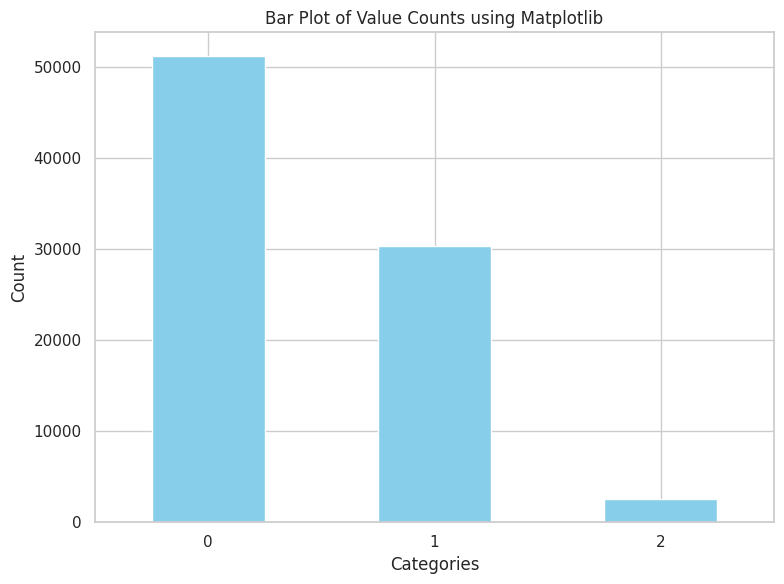

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Generate value counts for the 'Category' column
value_counts = obesitas['Sering menderita sakit kepala ?'].value_counts()

# Create a bar plot using Matplotlib
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Bar Plot of Value Counts using Matplotlib')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
obesitas["Tidak nafsu makan ?"].value_counts()

0    74576
1     9101
2      418
Name: Tidak nafsu makan ?, dtype: int64

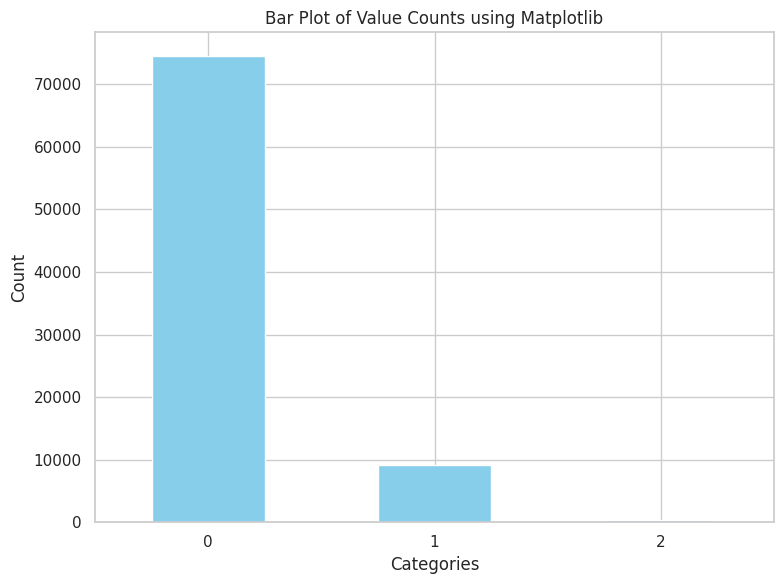

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Generate value counts for the 'Category' column
value_counts = obesitas['Tidak nafsu makan ?'].value_counts()

# Create a bar plot using Matplotlib
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Bar Plot of Value Counts using Matplotlib')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
obesitas["Sulit tidur ?"].value_counts()

0    67093
1    14296
2     2706
Name: Sulit tidur ?, dtype: int64

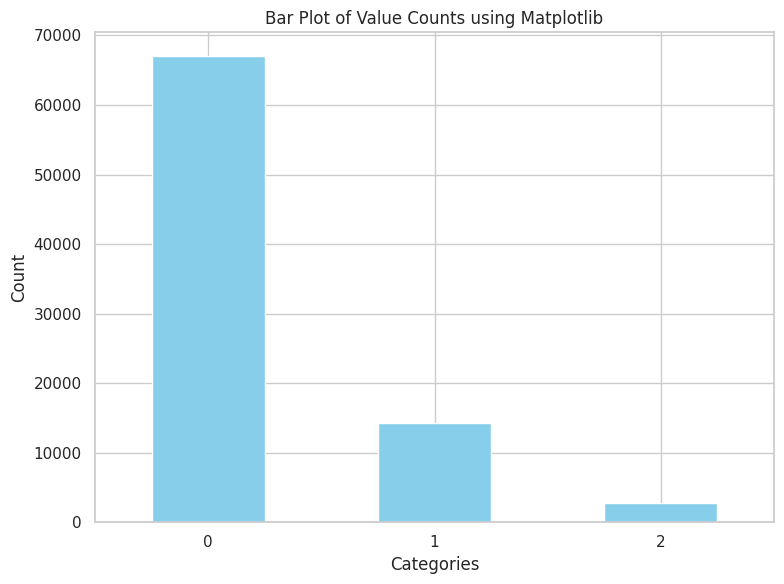

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Generate value counts for the 'Category' column
value_counts = obesitas["Sulit tidur ?"].value_counts()

# Create a bar plot using Matplotlib
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Bar Plot of Value Counts using Matplotlib')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
obesitas["Mudah takut ?"].value_counts()

0    78416
1     5053
2      626
Name: Mudah takut ?, dtype: int64

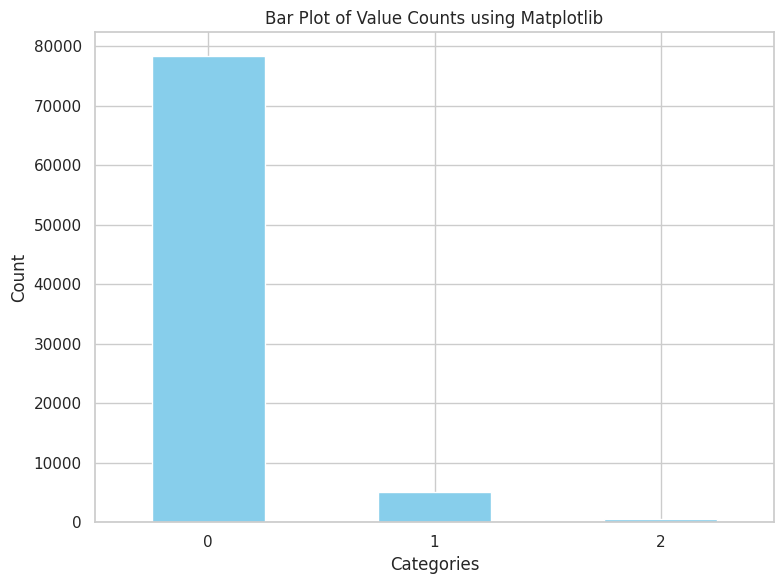

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Generate value counts for the 'Category' column
value_counts = obesitas["Mudah takut ?"].value_counts()

# Create a bar plot using Matplotlib
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Bar Plot of Value Counts using Matplotlib')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
obesitas["Merasa tegang, cemas atau kuatir ?"].value_counts()

0    72888
1    10146
2     1061
Name: Merasa tegang, cemas atau kuatir ?, dtype: int64

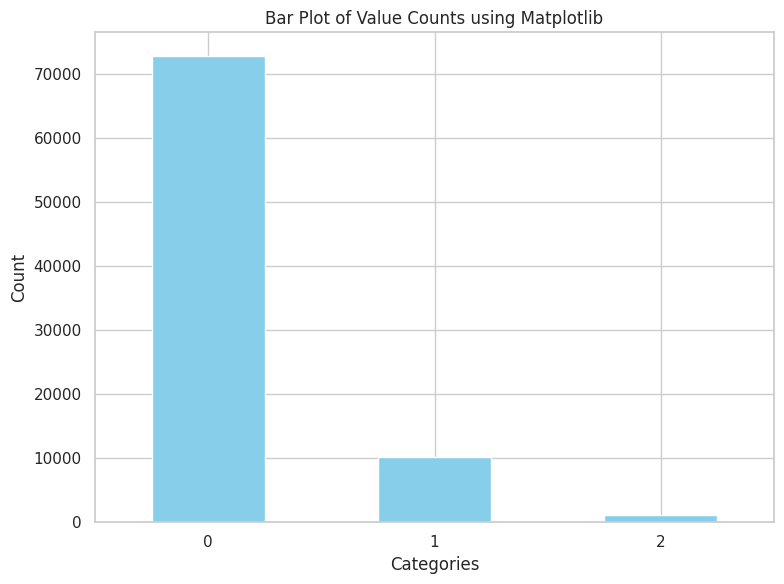

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Generate value counts for the 'Category' column
value_counts = obesitas["Merasa tegang, cemas atau kuatir ?"].value_counts()

# Create a bar plot using Matplotlib
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Bar Plot of Value Counts using Matplotlib')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
obesitas["Tangan anda gemetar ?"].value_counts()

0    80219
1     3348
2      528
Name: Tangan anda gemetar ?, dtype: int64

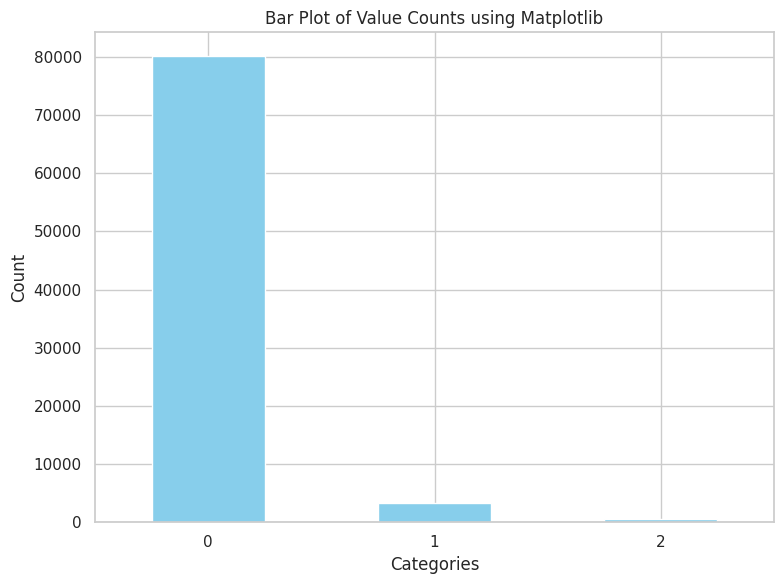

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Generate value counts for the 'Category' column
value_counts = obesitas["Tangan anda gemetar ?"].value_counts()

# Create a bar plot using Matplotlib
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Bar Plot of Value Counts using Matplotlib')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
obesitas["Pencernaan anda terganggu / buruk ?"].value_counts()

0    74294
1     8909
2      892
Name: Pencernaan anda terganggu / buruk ?, dtype: int64

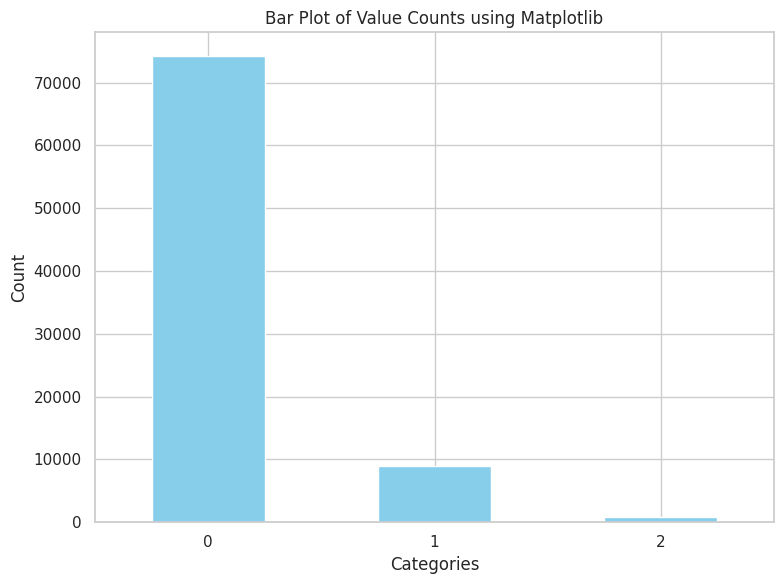

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Generate value counts for the 'Category' column
value_counts = obesitas["Pencernaan anda terganggu / buruk ?"].value_counts()

# Create a bar plot using Matplotlib
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Bar Plot of Value Counts using Matplotlib')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
obesitas["Sulit untuk berpikir jernih ?"].value_counts()

0    79087
1     4550
2      458
Name: Sulit untuk berpikir jernih ?, dtype: int64

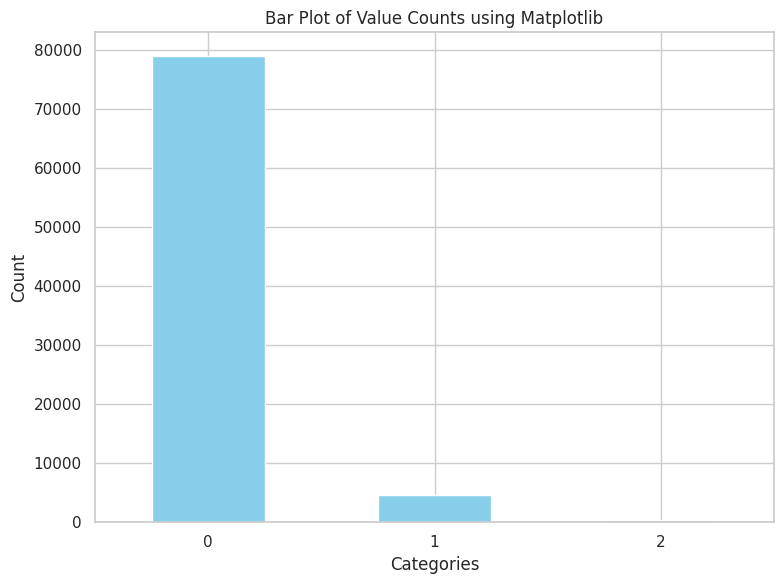

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Generate value counts for the 'Category' column
value_counts = obesitas["Sulit untuk berpikir jernih ?"].value_counts()

# Create a bar plot using Matplotlib
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Bar Plot of Value Counts using Matplotlib')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
obesitas["Merasa tidak bahagia ?"].value_counts()

0    80215
1     3350
2      530
Name: Merasa tidak bahagia ?, dtype: int64

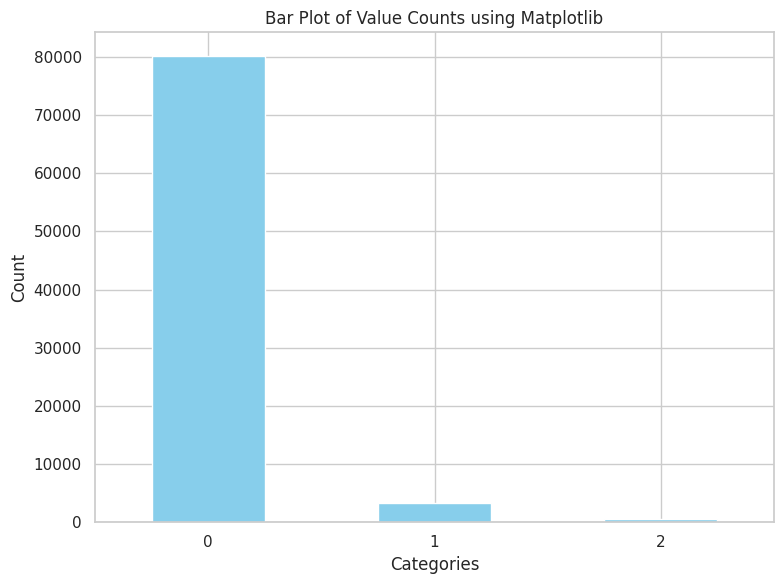

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Generate value counts for the 'Category' column
value_counts = obesitas["Merasa tidak bahagia ?"].value_counts()

# Create a bar plot using Matplotlib
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Bar Plot of Value Counts using Matplotlib')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
obesitas["Menangis lebih sering ?"].value_counts()

0    82572
1     1387
2      136
Name: Menangis lebih sering ?, dtype: int64

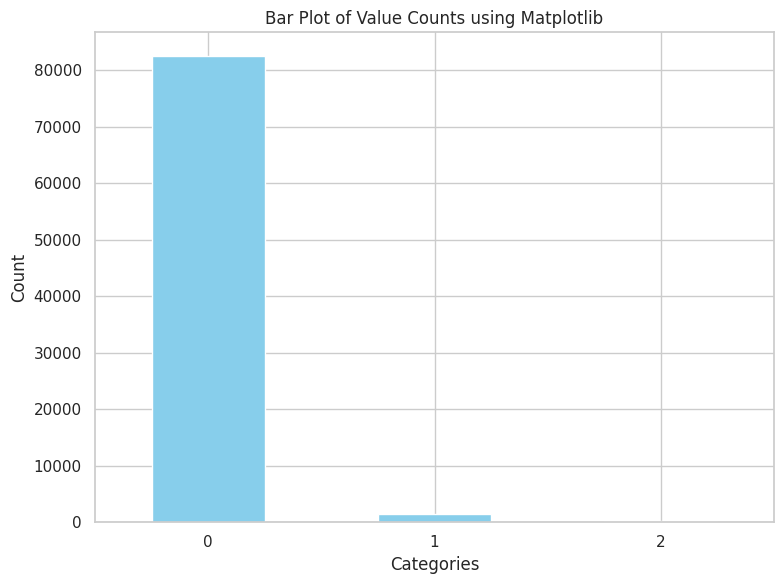

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Generate value counts for the 'Category' column
value_counts = obesitas["Menangis lebih sering ?"].value_counts()

# Create a bar plot using Matplotlib
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Bar Plot of Value Counts using Matplotlib')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
obesitas["Merasa sulit untuk menikmati kegiatan sehari – hari?"].value_counts()

0    80921
1     2751
2      423
Name: Merasa sulit untuk menikmati kegiatan sehari – hari?, dtype: int64

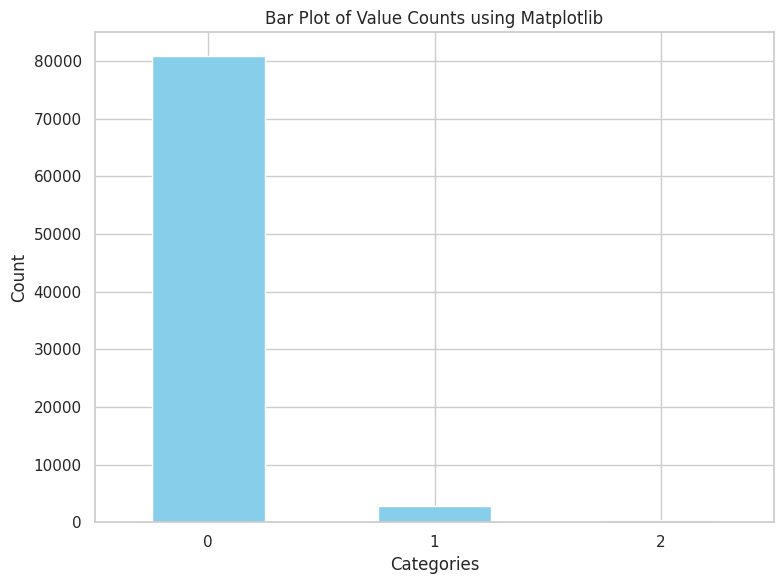

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Generate value counts for the 'Category' column
value_counts = obesitas["Merasa sulit untuk menikmati kegiatan sehari – hari?"].value_counts()

# Create a bar plot using Matplotlib
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Bar Plot of Value Counts using Matplotlib')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
obesitas["Sulit untuk mengambil keputusan ?"].value_counts()

0    78917
1     4834
2      344
Name: Sulit untuk mengambil keputusan ?, dtype: int64

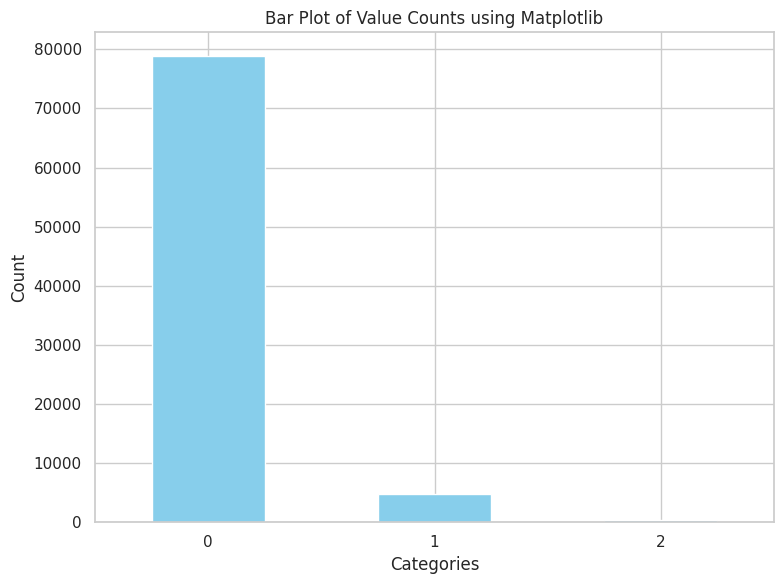

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Generate value counts for the 'Category' column
value_counts = obesitas["Sulit untuk mengambil keputusan ?"].value_counts()

# Create a bar plot using Matplotlib
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Bar Plot of Value Counts using Matplotlib')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
obesitas["Pekerjaan anda sehari – hari terganggu ?"].value_counts()

0    81376
1     2443
2      276
Name: Pekerjaan anda sehari – hari terganggu ?, dtype: int64

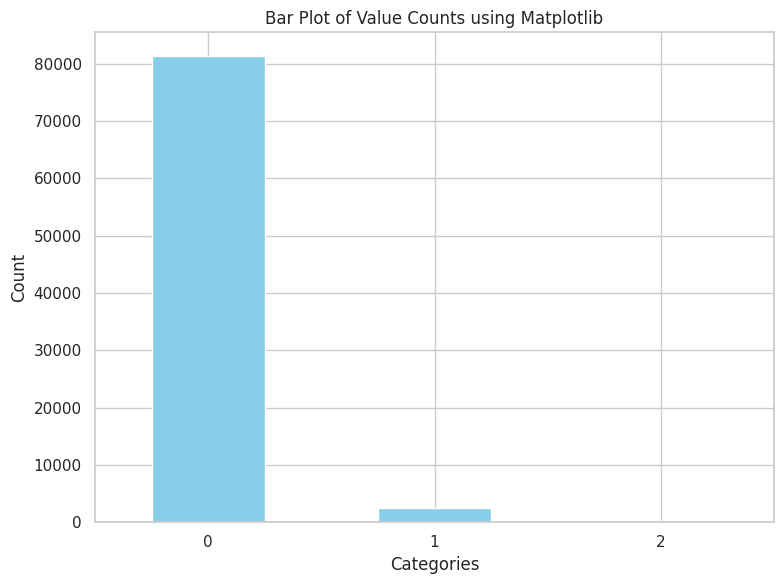

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Generate value counts for the 'Category' column
value_counts = obesitas["Pekerjaan anda sehari – hari terganggu ?"].value_counts()

# Create a bar plot using Matplotlib
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Bar Plot of Value Counts using Matplotlib')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
obesitas["Tidak mampu melakukan hal – hal yang bermanfaat dalam hidup?"].value_counts()

0    82428
1     1388
2      279
Name: Tidak mampu melakukan hal – hal yang bermanfaat dalam hidup?, dtype: int64

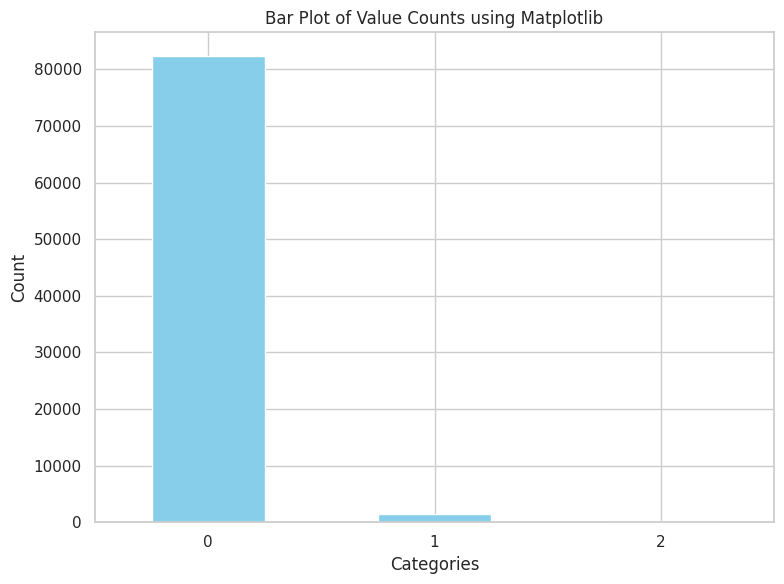

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Generate value counts for the 'Category' column
value_counts = obesitas["Tidak mampu melakukan hal – hal yang bermanfaat dalam hidup?"].value_counts()

# Create a bar plot using Matplotlib
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Bar Plot of Value Counts using Matplotlib')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
obesitas["Kehilangan minat pada berbagai hal ?"].value_counts()

0    80823
1     2980
2      292
Name: Kehilangan minat pada berbagai hal ?, dtype: int64

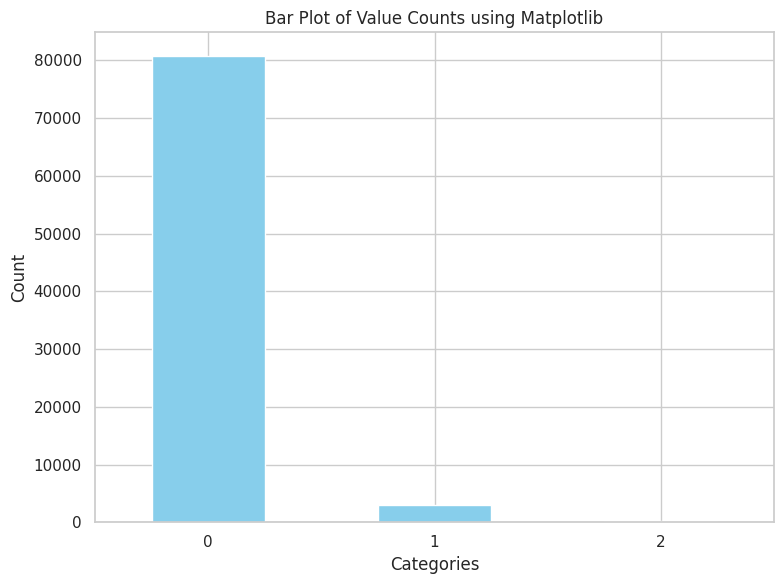

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Generate value counts for the 'Category' column
value_counts = obesitas["Kehilangan minat pada berbagai hal ?"].value_counts()

# Create a bar plot using Matplotlib
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Bar Plot of Value Counts using Matplotlib')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
obesitas["Tidak merasa berharga?"].value_counts()

0    82166
1     1656
2      273
Name: Tidak merasa berharga?, dtype: int64

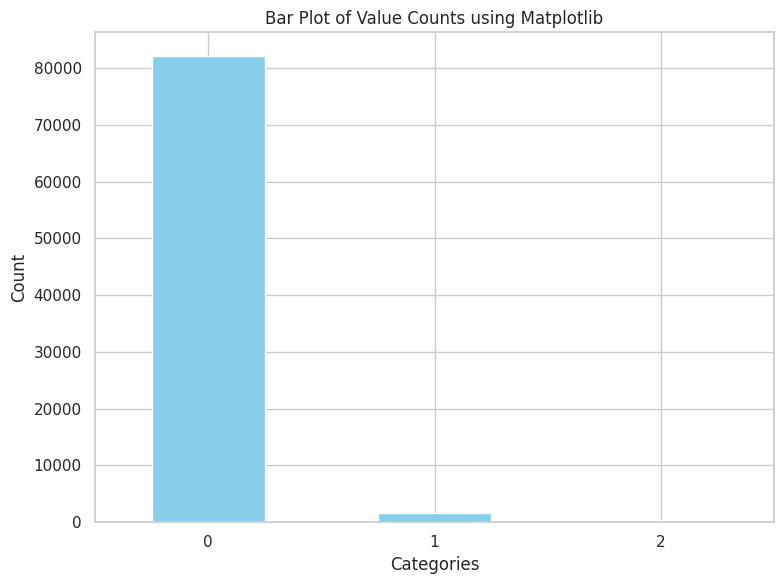

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Generate value counts for the 'Category' column
value_counts = obesitas["Tidak merasa berharga?"].value_counts()

# Create a bar plot using Matplotlib
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Bar Plot of Value Counts using Matplotlib')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
obesitas["Mempunyai pikiran untuk mengakhiri hidup?"].value_counts()

0    83707
1      320
2       68
Name: Mempunyai pikiran untuk mengakhiri hidup?, dtype: int64

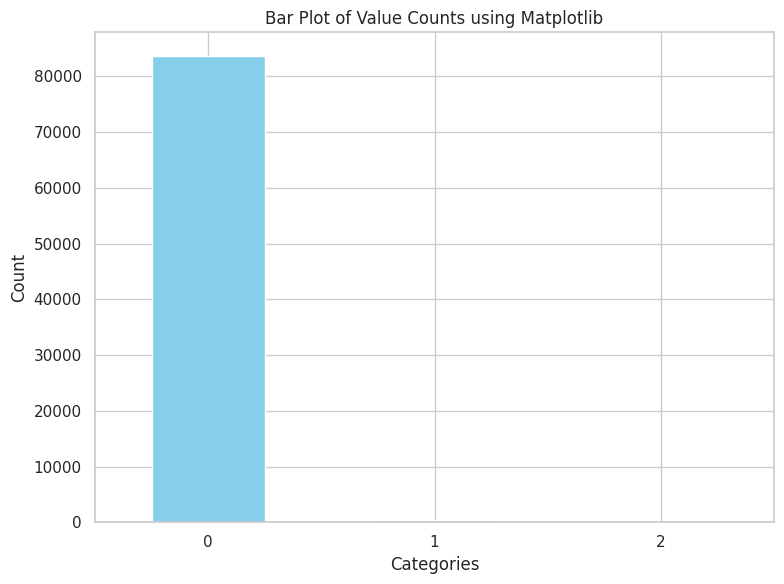

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Generate value counts for the 'Category' column
value_counts = obesitas["Mempunyai pikiran untuk mengakhiri hidup?"].value_counts()

# Create a bar plot using Matplotlib
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Bar Plot of Value Counts using Matplotlib')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
obesitas["Merasa lelah sepanjang waktu?"].value_counts()

0    78618
1     5136
2      341
Name: Merasa lelah sepanjang waktu?, dtype: int64

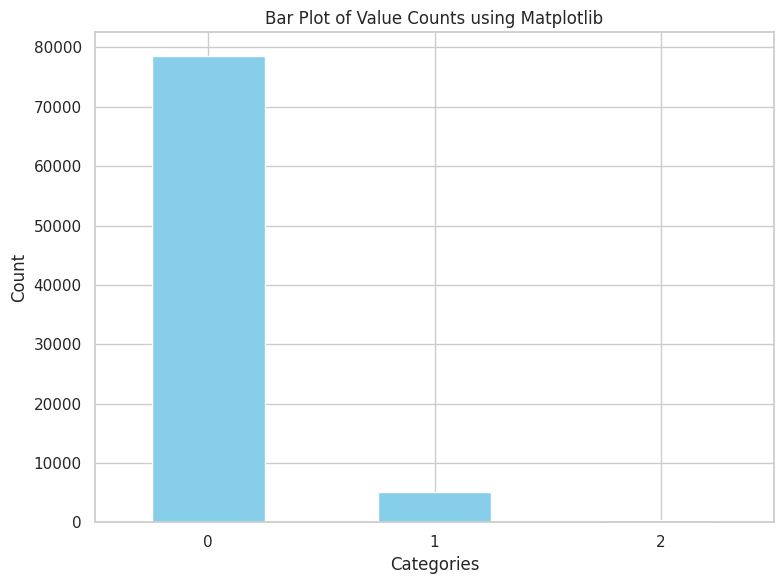

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Generate value counts for the 'Category' column
value_counts = obesitas["Merasa lelah sepanjang waktu?"].value_counts()

# Create a bar plot using Matplotlib
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Bar Plot of Value Counts using Matplotlib')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
obesitas["Mengalami rasa tidak enak di perut?"].value_counts()

0    71334
1    11785
2      976
Name: Mengalami rasa tidak enak di perut?, dtype: int64

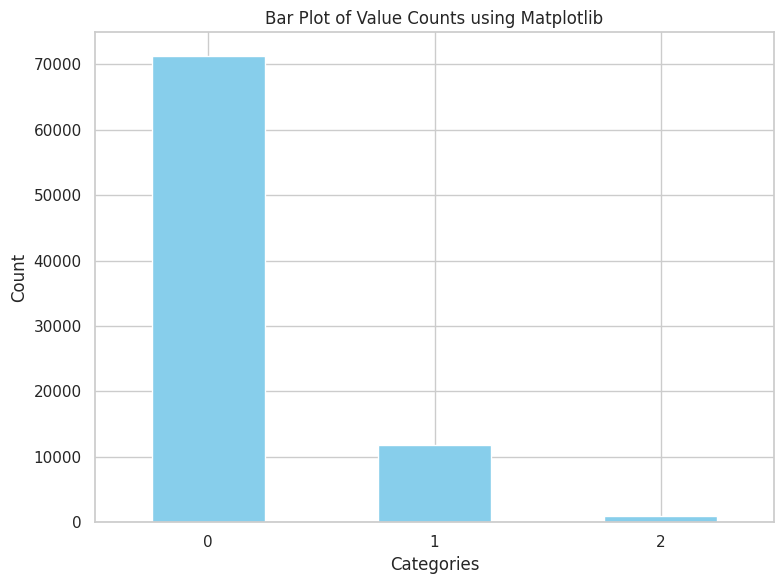

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Generate value counts for the 'Category' column
value_counts = obesitas["Mengalami rasa tidak enak di perut?"].value_counts()

# Create a bar plot using Matplotlib
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Bar Plot of Value Counts using Matplotlib')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
obesitas["Mudah lelah ?"].value_counts()

0    78447
2     5648
Name: Mudah lelah ?, dtype: int64

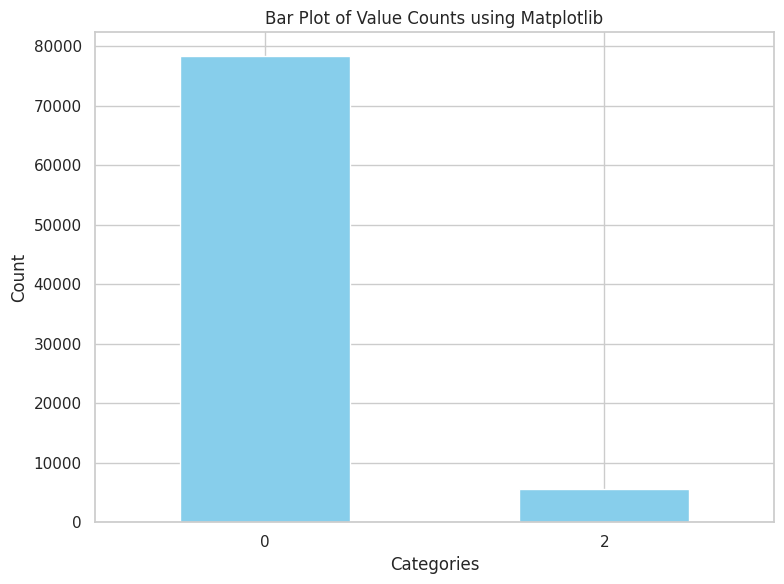

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Generate value counts for the 'Category' column
value_counts = obesitas["Mudah lelah ?"].value_counts()

# Create a bar plot using Matplotlib
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Bar Plot of Value Counts using Matplotlib')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
gejala.reset_index(drop = True, inplace = True)

In [ ]:
gejala['Mudah lelah ?'].value_counts()

0    275237
2     14557
Name: Mudah lelah ?, dtype: int64

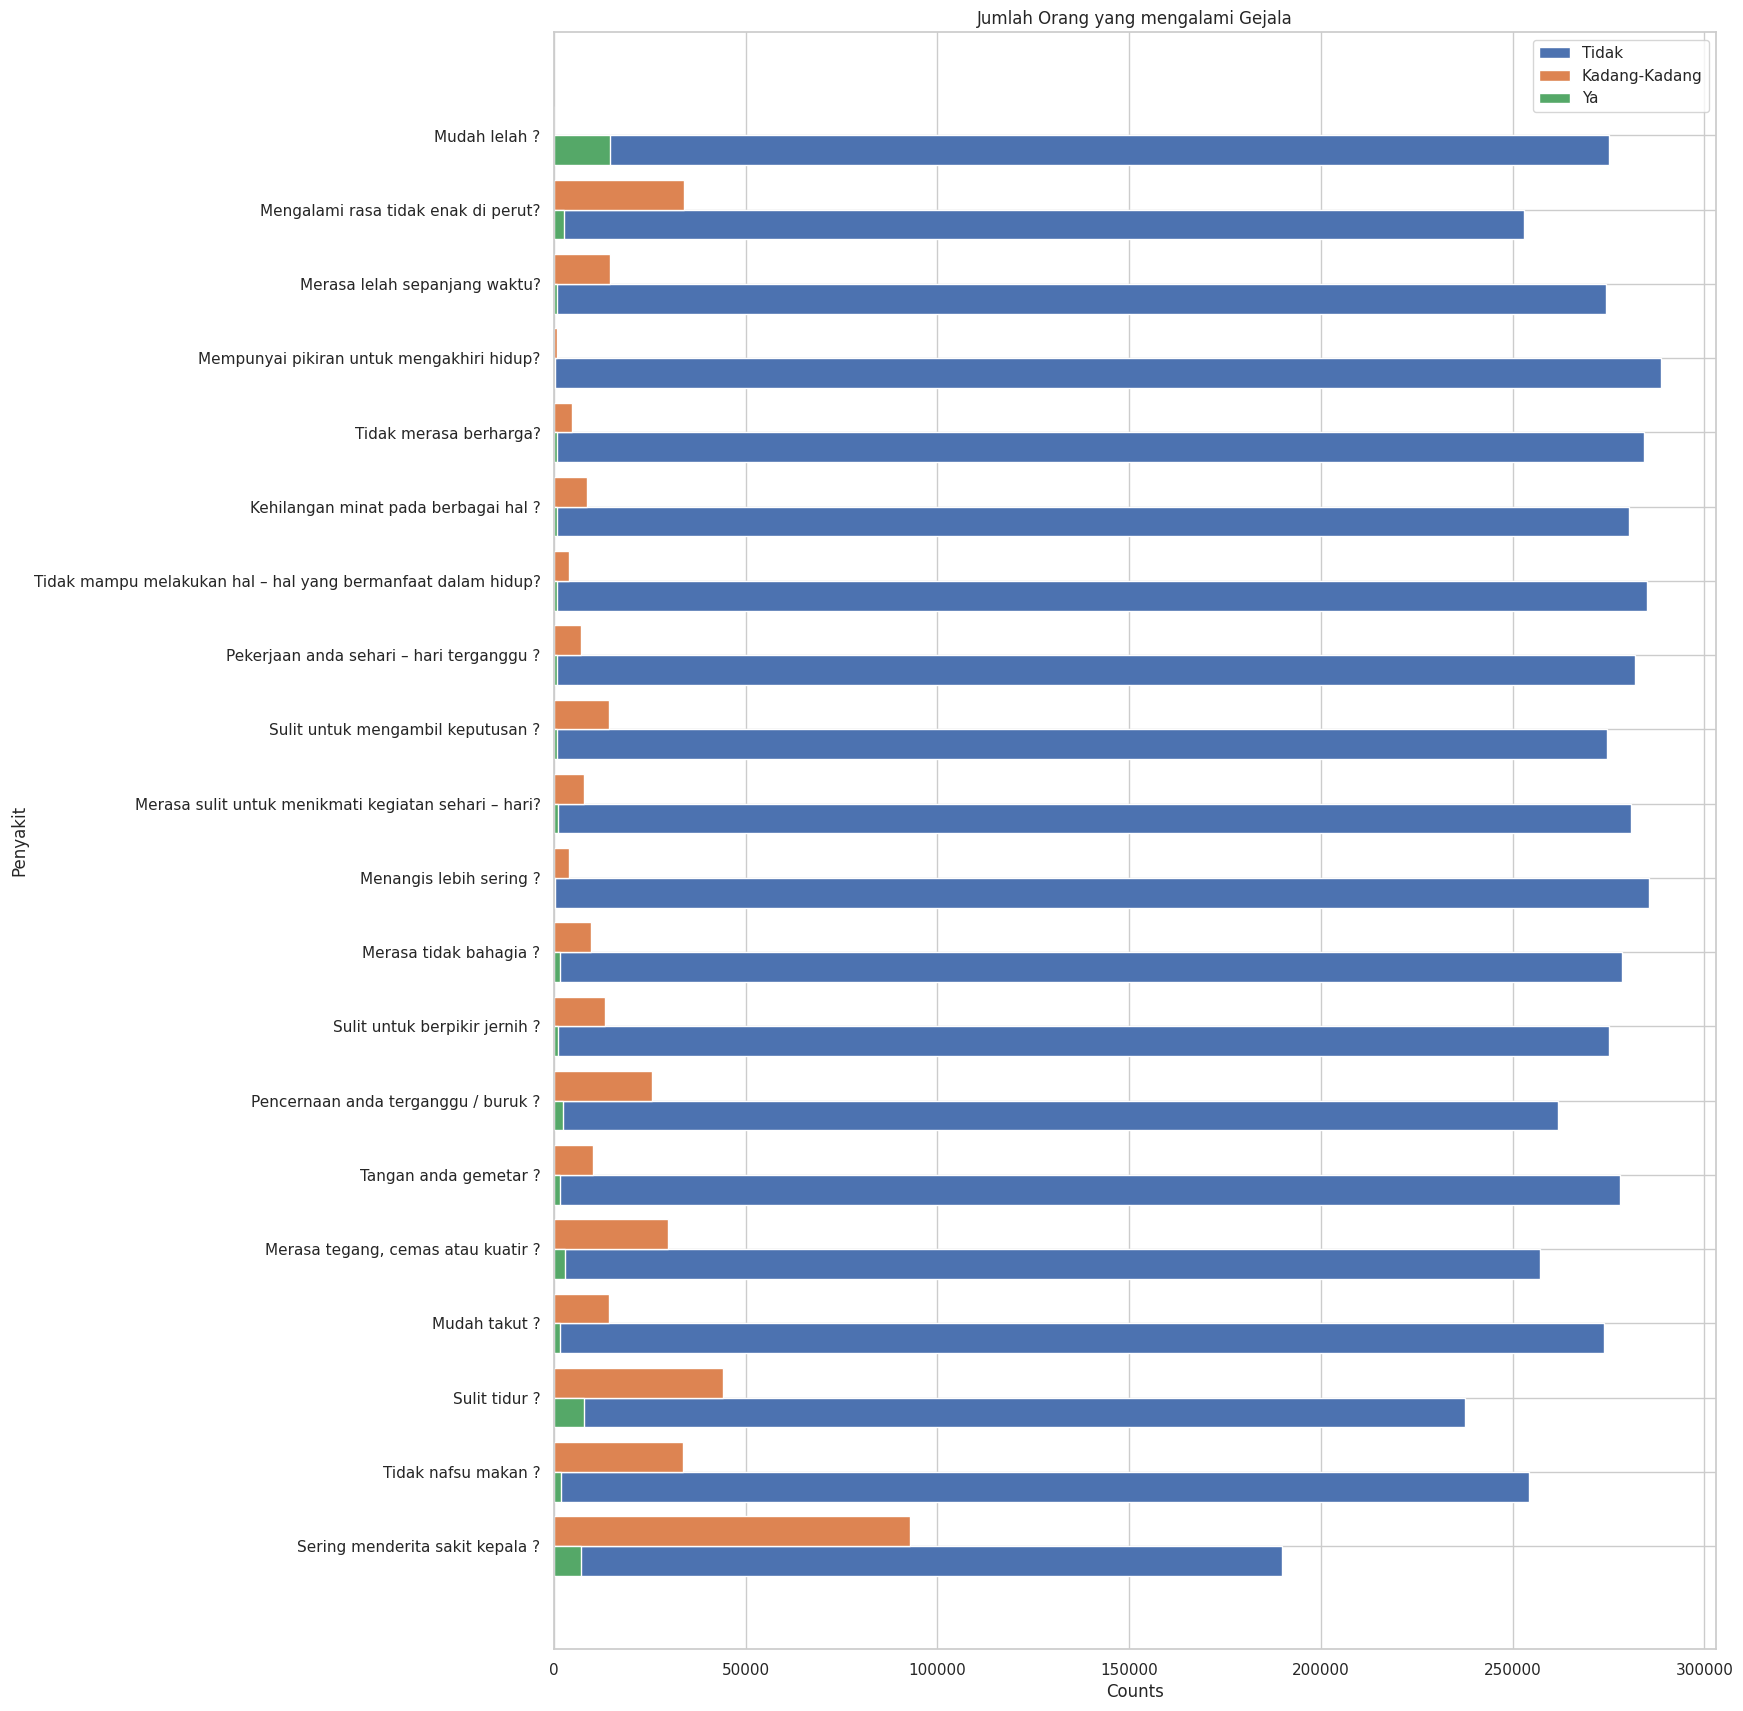

In [ ]:
X = ['Sering menderita sakit kepala ?', 'Tidak nafsu makan ?',
       'Sulit tidur ?', 'Mudah takut ?', 'Merasa tegang, cemas atau kuatir ?',
       'Tangan anda gemetar ?', 'Pencernaan anda terganggu / buruk ?',
       'Sulit untuk berpikir jernih ?', 'Merasa tidak bahagia ?',
       'Menangis lebih sering ?',
       'Merasa sulit untuk menikmati kegiatan sehari – hari?',
       'Sulit untuk mengambil keputusan ?',
       'Pekerjaan anda sehari – hari terganggu ?',
       'Tidak mampu melakukan hal – hal yang bermanfaat dalam hidup?',
       'Kehilangan minat pada berbagai hal ?', 'Tidak merasa berharga?',
       'Mempunyai pikiran untuk mengakhiri hidup?',
       'Merasa lelah sepanjang waktu?', 'Mengalami rasa tidak enak di perut?',
       'Mudah lelah ?']

klasifikasigejala = klasifikasigejala.drop(columns=[])

Ytidak = [gejala['Sering menderita sakit kepala ?'].value_counts()[0],
          gejala['Tidak nafsu makan ?'].value_counts()[0],
          gejala['Sulit tidur ?'].value_counts()[0],
          gejala['Mudah takut ?'].value_counts()[0],
          gejala['Merasa tegang, cemas atau kuatir ?'].value_counts()[0],
          gejala['Tangan anda gemetar ?'].value_counts()[0],
          gejala['Pencernaan anda terganggu / buruk ?'].value_counts()[0],
          gejala['Sulit untuk berpikir jernih ?'].value_counts()[0],
          gejala['Merasa tidak bahagia ?'].value_counts()[0],
          gejala['Menangis lebih sering ?'].value_counts()[0],
          gejala['Merasa sulit untuk menikmati kegiatan sehari – hari?'].value_counts()[0],
          gejala['Sulit untuk mengambil keputusan ?'].value_counts()[0],
          gejala['Pekerjaan anda sehari – hari terganggu ?'].value_counts()[0],
          gejala['Tidak mampu melakukan hal – hal yang bermanfaat dalam hidup?'].value_counts()[0],
          gejala['Kehilangan minat pada berbagai hal ?'].value_counts()[0],
          gejala['Tidak merasa berharga?'].value_counts()[0],
          gejala['Mempunyai pikiran untuk mengakhiri hidup?'].value_counts()[0],
          gejala['Merasa lelah sepanjang waktu?'].value_counts()[0],
          gejala['Mengalami rasa tidak enak di perut?'].value_counts()[0],
          gejala['Mudah lelah ?'].value_counts()[0]]
Zkadang = [gejala['Sering menderita sakit kepala ?'].value_counts()[1],
          gejala['Tidak nafsu makan ?'].value_counts()[1],
          gejala['Sulit tidur ?'].value_counts()[1],
          gejala['Mudah takut ?'].value_counts()[1],
          gejala['Merasa tegang, cemas atau kuatir ?'].value_counts()[1],
          gejala['Tangan anda gemetar ?'].value_counts()[1],
          gejala['Pencernaan anda terganggu / buruk ?'].value_counts()[1],
          gejala['Sulit untuk berpikir jernih ?'].value_counts()[1],
          gejala['Merasa tidak bahagia ?'].value_counts()[1],
          gejala['Menangis lebih sering ?'].value_counts()[1],
          gejala['Merasa sulit untuk menikmati kegiatan sehari – hari?'].value_counts()[1],
          gejala['Sulit untuk mengambil keputusan ?'].value_counts()[1],
          gejala['Pekerjaan anda sehari – hari terganggu ?'].value_counts()[1],
          gejala['Tidak mampu melakukan hal – hal yang bermanfaat dalam hidup?'].value_counts()[1],
          gejala['Kehilangan minat pada berbagai hal ?'].value_counts()[1],
          gejala['Tidak merasa berharga?'].value_counts()[1],
          gejala['Mempunyai pikiran untuk mengakhiri hidup?'].value_counts()[1],
          gejala['Merasa lelah sepanjang waktu?'].value_counts()[1],
          gejala['Mengalami rasa tidak enak di perut?'].value_counts()[1]]

Aya = [gejala['Sering menderita sakit kepala ?'].value_counts()[2],
          gejala['Tidak nafsu makan ?'].value_counts()[2],
          gejala['Sulit tidur ?'].value_counts()[2],
          gejala['Mudah takut ?'].value_counts()[2],
          gejala['Merasa tegang, cemas atau kuatir ?'].value_counts()[2],
          gejala['Tangan anda gemetar ?'].value_counts()[2],
          gejala['Pencernaan anda terganggu / buruk ?'].value_counts()[2],
          gejala['Sulit untuk berpikir jernih ?'].value_counts()[2],
          gejala['Merasa tidak bahagia ?'].value_counts()[2],
          gejala['Menangis lebih sering ?'].value_counts()[2],
          gejala['Merasa sulit untuk menikmati kegiatan sehari – hari?'].value_counts()[2],
          gejala['Sulit untuk mengambil keputusan ?'].value_counts()[2],
          gejala['Pekerjaan anda sehari – hari terganggu ?'].value_counts()[2],
          gejala['Tidak mampu melakukan hal – hal yang bermanfaat dalam hidup?'].value_counts()[2],
          gejala['Kehilangan minat pada berbagai hal ?'].value_counts()[2],
          gejala['Tidak merasa berharga?'].value_counts()[2],
          gejala['Mempunyai pikiran untuk mengakhiri hidup?'].value_counts()[2],
          gejala['Merasa lelah sepanjang waktu?'].value_counts()[2],
          gejala['Mengalami rasa tidak enak di perut?'].value_counts()[2],
          gejala['Mudah lelah ?'].value_counts()[2]]

Zkadang.append(0)

X_axis = np.arange(len(X))

gejala


plt.figure(figsize=(15,21))
plt.barh(X_axis - 0.2, Ytidak, 0.4, label = 'Tidak')
plt.barh(X_axis + 0.2, Zkadang, 0.4, label = 'Kadang-Kadang')
plt.barh(X_axis - 0.2, Aya, 0.4, label = 'Ya')

plt.yticks(X_axis, X)
plt.xlabel("Counts")
plt.ylabel("Penyakit")
plt.title("Jumlah Orang yang mengalami Gejala")
plt.legend()
plt.show()

In [ ]:
Zkadang

[92860,
 33592,
 44189,
 14416,
 29722,
 10140,
 25713,
 13398,
 9739,
 3878,
 7776,
 14306,
 7211,
 3910,
 8558,
 4686,
 913,
 14575,
 34000,
 0]